## Import necessary libaries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud_data = pd.read_csv('Fraud_check (1).csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


## Data understanding

In [3]:
fraud_data.shape

(600, 6)

In [4]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
fraud_data = fraud_data.rename(columns={'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population','Work.Experience':'Work_Experience'})

In [7]:
fraud_data['Good/Risky'] = fraud_data['Taxable_Income']

In [8]:
fraud_data['Good/Risky'] = fraud_data['Good/Risky'].apply(lambda x:'Risky' if x<=30000 else 'Good')
fraud_data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Good/Risky
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
fraud_data['Good/Risky'].value_counts()

Good     476
Risky    124
Name: Good/Risky, dtype: int64

In [10]:
del fraud_data['Taxable_Income']

In [11]:
fraud_data2 = fraud_data.copy()

## Label encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
fraud_data2['Undergrad']      = le.fit_transform(fraud_data2['Undergrad'])
fraud_data2['Marital_Status'] = le.fit_transform(fraud_data2['Marital_Status'])
fraud_data2['Urban']          = le.fit_transform(fraud_data2['Urban'])
fraud_data2['Good/Risky']     = le.fit_transform(fraud_data2['Good/Risky'])

In [14]:
X = fraud_data2.drop(labels='Good/Risky',axis=1)
y = fraud_data2[['Good/Risky']]

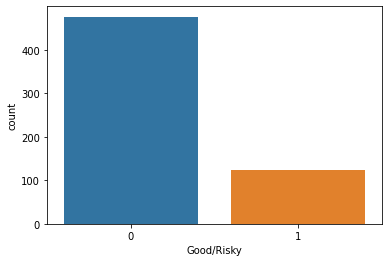

In [15]:
sns.countplot(x='Good/Risky',data=fraud_data2)
plt.show()

## Observation

### output data is imbalance

## Standard scalar

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
std_scale = StandardScaler()
scaled_X  = std_scale.fit_transform(X)
scaled_X  = pd.DataFrame(scaled_X,columns=X.columns)

## Data spliting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state=12,stratify=y)

In [20]:
X_train.shape,y_train.shape

((480, 5), (480, 1))

In [21]:
X_test.shape,y_test.shape

((120, 5), (120, 1))

## Model Training | Testing | Evaluation

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [23]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred   = rf_model.predict(X_test)

print('accuracy score          :',round(accuracy_score(y_test,y_pred),4))
print('precision score         :',round(precision_score(y_test,y_pred),4))
print('recall score            :',round(recall_score(y_test,y_pred),4))
print('confusion score         :\n',confusion_matrix(y_test,y_pred))

accuracy score          : 0.7417
precision score         : 0.125
recall score            : 0.04
confusion score         :
 [[88  7]
 [24  1]]


## Tune Decision tree using gridsearch cv

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
grid_cv = GridSearchCV(estimator=rf_model,param_grid={
    'criterion':['gini','entropy'],
    'max_depth':range(4,11)
})
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 11)})

In [26]:
grid_cv.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [27]:
rf_model = RandomForestClassifier(criterion='gini',max_depth=4,random_state=13,class_weight={1:2})
rf_model.fit(X_train,y_train)
y_pred   = rf_model.predict(X_test)

print('accuracy score          :',round(accuracy_score(y_test,y_pred),4))
print('precision score         :',round(precision_score(y_test,y_pred),4))
print('recall score            :',round(recall_score(y_test,y_pred),4))
print('confusion score         :\n',confusion_matrix(y_test,y_pred))

accuracy score          : 0.7917
precision score         : 0.0
recall score            : 0.0
confusion score         :
 [[95  0]
 [25  0]]


## Observation

### we get 79% accuracy

## ============================== End ==================================